# Off-Facebook Analysis Report
## Brody Coyne
### 11/23/2022

In [127]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import json
import base64
import requests

### Part 1

Loading in the data and creating a dataFrame.

In [128]:
with open(r"your_off-facebook_activity.json") as j:
    fb_dat = json.load(j)

In [129]:
fb_dat_df = pd.DataFrame(fb_dat['off_facebook_activity_v2'])

In [130]:
fb_dat_df

,name,events
0,Spotify: Spotify: Music and Podcasts,"[{'id': 174829003346, 'type': 'CUSTOM', 'times..."
1,cameo.com,"[{'id': 443618109326032, 'type': 'PAGE_VIEW', ..."
2,kent.edu,"[{'id': 661904321318543, 'type': 'PAGE_VIEW', ..."
3,Allstate,"[{'id': 2702763333090634, 'type': 'CUSTOM', 't..."
4,Bed Bath & Beyond,"[{'id': 346165315733088, 'type': 'PURCHASE', '..."
...,...,...
570,goodyear.com,"[{'id': 493663731138538, 'type': 'PAGE_VIEW', ..."
571,futurism.com,"[{'id': 286353685112848, 'type': 'PAGE_VIEW', ..."
572,flixlist.co,"[{'id': 687389134726121, 'type': 'PAGE_VIEW', ..."
573,freedomscientific.com,"[{'id': 2984607088284540, 'type': 'PAGE_VIEW',..."


I would assume that kent.edu would be the most visited.

In [131]:
fb_dat_df['events'][0]

[{'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1630869660}]

In [132]:
events = [len(x) for x in fb_dat_df['events']]

Adding a column to display the number of times a website was visited and then put it in order from largest to smallest.

In [133]:
fb_dat_df['count'] = events

In [134]:
fb_dat_df = fb_dat_df.sort_values('count', ascending = False).head(30)

In [135]:
fb_dat_df

,name,events,count
36,TikTok,"[{'id': 597615686992125, 'type': 'ACTIVATE_APP...",838
2,kent.edu,"[{'id': 661904321318543, 'type': 'PAGE_VIEW', ...",631
230,"Hulu: Stream new TV shows, movies & series","[{'id': 40582213222, 'type': 'ACTIVATE_APP', '...",125
45,"Hulu: Watch TV shows, movies & new original se...","[{'id': 40582213222, 'type': 'ACTIVATE_APP', '...",118
6,sagepub.com,"[{'id': 806414442901154, 'type': 'CUSTOM', 'ti...",84
213,"Discord - Talk, Video Chat & Hang Out with Fri...","[{'id': 515083072013600, 'type': 'ACTIVATE_APP...",53
7,wiley.com,"[{'id': 263124174624252, 'type': 'CUSTOM', 'ti...",51
273,Hades' Star,"[{'id': 166973193707938, 'type': 'ACTIVATE_APP...",46
232,Fitbit,"[{'id': 106920676011663, 'type': 'CUSTOM', 'ti...",40
208,U.S. Bank - Inspired by customers,"[{'id': 1591992844216198, 'type': 'ACTIVATE_AP...",39


This histogram shows the number of times visiting different websites. This shows that most websites were visited only a few times. However, there are some significant outliers with two websites being viewed over 600 times.

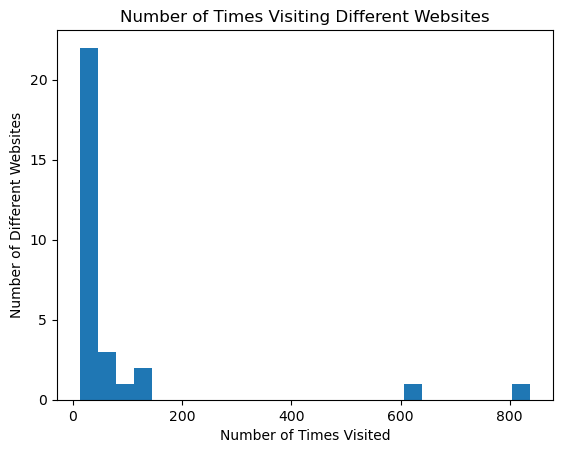

In [136]:
fig, ax1 = plt.subplots()
fb_dat_hist = fb_dat_df['count']
ax1.hist(fb_dat_hist, bins = 25)

ax1.set_title('Number of Times Visiting Different Websites')
ax1.set_xlabel('Number of Times Visited')
ax1.set_ylabel('Number of Different Websites')

plt.show()

This bar plot shows the top 20 most visted websites. It gives a better visual of tiktok and kent.edu as outliers.

C:\Users\brody\AppData\Local\Temp\ipykernel_16828\1160438909.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.bar(fb_name[0:20],fb_dat_bar[0:20])


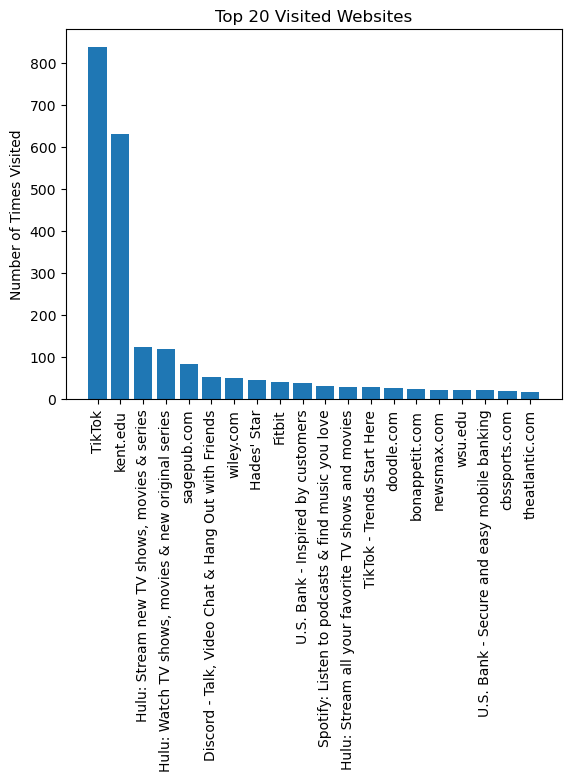

In [137]:
fig, ax1 = plt.subplots()
fb_dat_bar = fb_dat_df['count']
fb_name = fb_dat_df['name']
ax1.bar(fb_name[0:20],fb_dat_bar[0:20])
plt.xticks(rotation=90)


ax1.set_title('Top 20 Visited Websites')
ax1.set_ylabel('Number of Times Visited')

plt.show()

### Part 2

Getting access to the spotify data and downloading the track data for the two albums.

In [138]:
keys = pd.read_csv("spotify_keys.txt", header = 0, sep = ",")

In [139]:
appid = keys['Client_ID'][0]

In [140]:
appsecret = keys['Client_Secret'][0]

In [141]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [142]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [143]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [144]:
response = requests.post(access_token_url, headers = header, data = payload)

In [145]:
session_token = response.json()['access_token']

In [146]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

In [147]:
mbd_id = '5Co3CGD9lBQVNnn7q0px1g'

In [148]:
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(mbd_id)

In [149]:
mbd_tracks = requests.get(album_tracks_endpoint, headers = session_header)

In [150]:
mbd_tracks.status_code

200

spotify:album:5Co3CGD9lBQVNnn7q0px1g

In [151]:
mbd_dict = json.loads(mbd_tracks.text)

In [152]:
mbd_dict.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [153]:
mbd_dict['items'][0].keys()

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

In [154]:
mbd_track_ids = [x['id'] for x in mbd_dict['items']]

In [155]:
mbd_track_ids

['2WAufixPkOjvrBtAdQQTbr',
 '6ujdLuZXkyp4yKOZSE64nM',
 '0s2eTTKN5deHJttejOJDhg',
 '1D1sFcA13TLiLXmqHUFBXR',
 '4b9IYvyeGOy5xRdbJhKL4j',
 '2jtndL4TceQ0h6WEOYbUOA',
 '4K70ll19WPq5cIpCG1zuCy',
 '6hBBbDwrZijEoI5D790ojD',
 '7r0eNlqQs7QpWfG2zQuVC4',
 '76lVWU084mEPxGuRwxHE1K',
 '1Kmkp970rVmzoQLJfOvkYo',
 '4dfojOC0mkRk4CZdOwr4VT',
 '5rihsKwHtenOoACkEGOH50',
 '0rEnWTkCBqGRnL5k3Xn0tp',
 '3eI3GbmhTl5iVqobDHPtBZ',
 '2DYb8YmLv3bOUYokRT8KjJ',
 '6UjwKoH47d2FveB38u8Si9',
 '5zEsv2Uz9r7J5pGpCRdeTx',
 '1ivTl05rU3ATT3F4Uu3gea',
 '5wWufNs1j4v2HsL5IZ5Zlp']

In [156]:
mbd_track_strings = ','.join(str(x) for x in mbd_track_ids)
mbd_track_strings

'2WAufixPkOjvrBtAdQQTbr,6ujdLuZXkyp4yKOZSE64nM,0s2eTTKN5deHJttejOJDhg,1D1sFcA13TLiLXmqHUFBXR,4b9IYvyeGOy5xRdbJhKL4j,2jtndL4TceQ0h6WEOYbUOA,4K70ll19WPq5cIpCG1zuCy,6hBBbDwrZijEoI5D790ojD,7r0eNlqQs7QpWfG2zQuVC4,76lVWU084mEPxGuRwxHE1K,1Kmkp970rVmzoQLJfOvkYo,4dfojOC0mkRk4CZdOwr4VT,5rihsKwHtenOoACkEGOH50,0rEnWTkCBqGRnL5k3Xn0tp,3eI3GbmhTl5iVqobDHPtBZ,2DYb8YmLv3bOUYokRT8KjJ,6UjwKoH47d2FveB38u8Si9,5zEsv2Uz9r7J5pGpCRdeTx,1ivTl05rU3ATT3F4Uu3gea,5wWufNs1j4v2HsL5IZ5Zlp'

In [157]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(mbd_track_strings)

In [158]:
mbd_features = requests.get(track_features_endpoint, headers = session_header)

In [159]:
mbd_features.status_code

200

In [160]:
mbd_dict = json.loads(mbd_features.text)

In [161]:
mbd_dict.keys()

dict_keys(['audio_features'])

In [162]:
mbd_dict['audio_features'][0]

{'danceability': 0.613,
 'energy': 0.6,
 'key': 10,
 'loudness': -5.621,
 'mode': 1,
 'speechiness': 0.281,
 'acousticness': 0.108,
 'instrumentalness': 1.67e-06,
 'liveness': 0.274,
 'valence': 0.067,
 'tempo': 130.732,
 'type': 'audio_features',
 'id': '2WAufixPkOjvrBtAdQQTbr',
 'uri': 'spotify:track:2WAufixPkOjvrBtAdQQTbr',
 'track_href': 'https://api.spotify.com/v1/tracks/2WAufixPkOjvrBtAdQQTbr',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2WAufixPkOjvrBtAdQQTbr',
 'duration_ms': 270671,
 'time_signature': 4}

In [163]:
mbd_df = pd.DataFrame(mbd_dict['audio_features'])

In [164]:
mbd_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.613,0.600,10,-5.621,1,0.2810,0.10800,0.000002,0.2740,0.0670,130.732,audio_features,2WAufixPkOjvrBtAdQQTbr,spotify:track:2WAufixPkOjvrBtAdQQTbr,https://api.spotify.com/v1/tracks/2WAufixPkOjv...,https://api.spotify.com/v1/audio-analysis/2WAu...,270671,4
1,0.653,0.547,8,-6.324,1,0.1710,0.00898,0.000000,0.1160,0.2480,93.631,audio_features,6ujdLuZXkyp4yKOZSE64nM,spotify:track:6ujdLuZXkyp4yKOZSE64nM,https://api.spotify.com/v1/tracks/6ujdLuZXkyp4...,https://api.spotify.com/v1/audio-analysis/6ujd...,163509,4
2,0.585,0.437,4,-7.145,0,0.2230,0.92300,0.000000,0.1540,0.6180,80.178,audio_features,0s2eTTKN5deHJttejOJDhg,spotify:track:0s2eTTKN5deHJttejOJDhg,https://api.spotify.com/v1/tracks/0s2eTTKN5deH...,https://api.spotify.com/v1/audio-analysis/0s2e...,76832,1
3,0.663,0.583,11,-5.789,0,0.2750,0.00472,0.000000,0.1250,0.1460,121.678,audio_features,1D1sFcA13TLiLXmqHUFBXR,spotify:track:1D1sFcA13TLiLXmqHUFBXR,https://api.spotify.com/v1/tracks/1D1sFcA13TLi...,https://api.spotify.com/v1/audio-analysis/1D1s...,316733,4
4,0.832,0.541,3,-8.324,0,0.0684,0.56800,0.001180,0.1110,0.2330,131.994,audio_features,4b9IYvyeGOy5xRdbJhKL4j,spotify:track:4b9IYvyeGOy5xRdbJhKL4j,https://api.spotify.com/v1/tracks/4b9IYvyeGOy5...,https://api.spotify.com/v1/audio-analysis/4b9I...,219813,4
5,0.788,0.505,7,-6.507,1,0.0476,0.02170,0.000000,0.1760,0.1190,129.939,audio_features,2jtndL4TceQ0h6WEOYbUOA,spotify:track:2jtndL4TceQ0h6WEOYbUOA,https://api.spotify.com/v1/tracks/2jtndL4TceQ0...,https://api.spotify.com/v1/audio-analysis/2jtn...,140743,4
6,0.924,0.459,5,-6.203,1,0.0541,0.00701,0.000000,0.1390,0.5480,117.857,audio_features,4K70ll19WPq5cIpCG1zuCy,spotify:track:4K70ll19WPq5cIpCG1zuCy,https://api.spotify.com/v1/tracks/4K70ll19WPq5...,https://api.spotify.com/v1/audio-analysis/4K70...,174502,4
7,0.736,0.307,1,-8.346,0,0.4310,0.42000,0.000132,0.1530,0.2030,170.022,audio_features,6hBBbDwrZijEoI5D790ojD,spotify:track:6hBBbDwrZijEoI5D790ojD,https://api.spotify.com/v1/tracks/6hBBbDwrZijE...,https://api.spotify.com/v1/audio-analysis/6hBB...,269728,4
8,0.822,0.696,4,-5.800,0,0.1170,0.04150,0.000000,0.0801,0.5680,153.988,audio_features,7r0eNlqQs7QpWfG2zQuVC4,spotify:track:7r0eNlqQs7QpWfG2zQuVC4,https://api.spotify.com/v1/tracks/7r0eNlqQs7Qp...,https://api.spotify.com/v1/audio-analysis/7r0e...,229608,4
9,0.711,0.611,1,-5.451,1,0.3650,0.00582,0.000000,0.2300,0.1430,134.111,audio_features,76lVWU084mEPxGuRwxHE1K,spotify:track:76lVWU084mEPxGuRwxHE1K,https://api.spotify.com/v1/tracks/76lVWU084mEP...,https://api.spotify.com/v1/audio-analysis/76lV...,252262,4


End of putting melodic blue deluxe into dataframe. Doing the same thing for the second album.

spotify:album:2CKiKnlmneU5Lr0aQLB83Q

In [165]:
tak_id = '2CKiKnlmneU5Lr0aQLB83Q'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(tak_id)
tak_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(tak_tracks.status_code)
tak_dict = json.loads(tak_tracks.text)
tak_track_ids = [x['id'] for x in tak_dict['items']]
tak_track_strings = ','.join(str(x) for x in tak_track_ids)
print(tak_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(tak_track_strings)

200
4J4SkI6qmb5ngZVw9mf9op,2wbcBAG51wD8fQw8ykL2Ab,1MJJcJnun68wUdIafVWBzZ,26LC5kDFE0vWJzVyaENajX,5KvKGFFNm1Y7jHTjaJF74h,6iBlllot0wdy8f7V5t8OnR,0Vn54m592UkfxfuvAuSr3H,0gcbrwbpdxGHE9nW0TCoKP,4zbr7Cp3UB00FurUovPU03,0WWnuzqf8eUwNMpLIIOBuC,0yUKUD6LFbdew01xIUpKHq,4LYNt6hWctTuZWYiwafuD6,6v7xYhlP2FwTRSA9SZtVSe,4J8NDr7VNVmKAjS4r5d6aq,1WGFoNy1wm8HpOn15IbsJK,5KQxun2WxwDMsV7HCN2ONK,3KhaY1T7QYAQzreGgZXZN6


In [166]:
tak_features = requests.get(track_features_endpoint, headers = session_header)
tak_features.status_code

200

In [167]:
tak_dict = json.loads(tak_features.text)
tak_dict['audio_features'][0]

{'danceability': 0.586,
 'energy': 0.742,
 'key': 11,
 'loudness': -3.829,
 'mode': 1,
 'speechiness': 0.0408,
 'acousticness': 0.0637,
 'instrumentalness': 0,
 'liveness': 0.302,
 'valence': 0.658,
 'tempo': 80.977,
 'type': 'audio_features',
 'id': '4J4SkI6qmb5ngZVw9mf9op',
 'uri': 'spotify:track:4J4SkI6qmb5ngZVw9mf9op',
 'track_href': 'https://api.spotify.com/v1/tracks/4J4SkI6qmb5ngZVw9mf9op',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4J4SkI6qmb5ngZVw9mf9op',
 'duration_ms': 162960,
 'time_signature': 4}

In [168]:
tak_df = pd.DataFrame(tak_dict['audio_features'])

In [169]:
tak_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.586,0.742,11,-3.829,1,0.0408,0.06370,0,0.3020,0.658,80.977,audio_features,4J4SkI6qmb5ngZVw9mf9op,spotify:track:4J4SkI6qmb5ngZVw9mf9op,https://api.spotify.com/v1/tracks/4J4SkI6qmb5n...,https://api.spotify.com/v1/audio-analysis/4J4S...,162960,4
1,0.679,0.818,1,-4.705,1,0.0580,0.03250,0,0.1870,0.532,74.952,audio_features,2wbcBAG51wD8fQw8ykL2Ab,spotify:track:2wbcBAG51wD8fQw8ykL2Ab,https://api.spotify.com/v1/tracks/2wbcBAG51wD8...,https://api.spotify.com/v1/audio-analysis/2wbc...,159971,1
2,0.674,0.761,1,-4.497,1,0.0575,0.10100,0,0.1260,0.431,147.930,audio_features,1MJJcJnun68wUdIafVWBzZ,spotify:track:1MJJcJnun68wUdIafVWBzZ,https://api.spotify.com/v1/tracks/1MJJcJnun68w...,https://api.spotify.com/v1/audio-analysis/1MJJ...,142655,4
3,0.422,0.491,6,-5.703,1,0.3680,0.19500,0,0.1420,0.670,184.344,audio_features,26LC5kDFE0vWJzVyaENajX,spotify:track:26LC5kDFE0vWJzVyaENajX,https://api.spotify.com/v1/tracks/26LC5kDFE0vW...,https://api.spotify.com/v1/audio-analysis/26LC...,181714,5
4,0.641,0.755,4,-3.621,0,0.1130,0.01620,0,0.0849,0.603,154.829,audio_features,5KvKGFFNm1Y7jHTjaJF74h,spotify:track:5KvKGFFNm1Y7jHTjaJF74h,https://api.spotify.com/v1/tracks/5KvKGFFNm1Y7...,https://api.spotify.com/v1/audio-analysis/5KvK...,161027,4
5,0.581,0.877,8,-4.938,1,0.1140,0.01510,0,0.8260,0.353,77.006,audio_features,6iBlllot0wdy8f7V5t8OnR,spotify:track:6iBlllot0wdy8f7V5t8OnR,https://api.spotify.com/v1/tracks/6iBlllot0wdy...,https://api.spotify.com/v1/audio-analysis/6iBl...,236883,4
6,0.449,0.852,1,-3.618,1,0.3080,0.00938,0,0.1270,0.425,156.675,audio_features,0Vn54m592UkfxfuvAuSr3H,spotify:track:0Vn54m592UkfxfuvAuSr3H,https://api.spotify.com/v1/tracks/0Vn54m592Ukf...,https://api.spotify.com/v1/audio-analysis/0Vn5...,140832,4
7,0.718,0.684,11,-5.160,0,0.2480,0.01820,0,0.2330,0.856,146.084,audio_features,0gcbrwbpdxGHE9nW0TCoKP,spotify:track:0gcbrwbpdxGHE9nW0TCoKP,https://api.spotify.com/v1/tracks/0gcbrwbpdxGH...,https://api.spotify.com/v1/audio-analysis/0gcb...,159452,4
8,0.672,0.654,1,-4.528,1,0.0966,0.20100,0,0.1000,0.404,78.512,audio_features,4zbr7Cp3UB00FurUovPU03,spotify:track:4zbr7Cp3UB00FurUovPU03,https://api.spotify.com/v1/tracks/4zbr7Cp3UB00...,https://api.spotify.com/v1/audio-analysis/4zbr...,188026,4
9,0.561,0.825,11,-4.859,0,0.0604,0.00372,0,0.3930,0.269,146.822,audio_features,0WWnuzqf8eUwNMpLIIOBuC,spotify:track:0WWnuzqf8eUwNMpLIIOBuC,https://api.spotify.com/v1/tracks/0WWnuzqf8eUw...,https://api.spotify.com/v1/audio-analysis/0WWn...,124060,4


Done with converting albums into dataframe.

The two albums I chose were The Melodic Blue (Deluxe Version) by Baby Keem and Trip at Knight by Trippie Redd. I chose the first album because he just came out with the deluxe version recently and I thought it was very good, it also made me go back and listen more to the original which made me like the whole project even more. I chose the second album because it is one of my favorite albums of all time and when I listen to the tracks it reminds me of some good memories. The type of music in the album is not most people's favorite but I find it very good and all of the tracks show what I like about most music, high energy and beat focused.

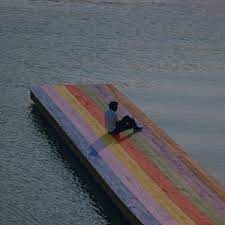

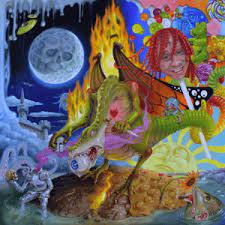

This histogram shows that most tracks from Trip at Knight are Louder which makes sense having listened to both albums.

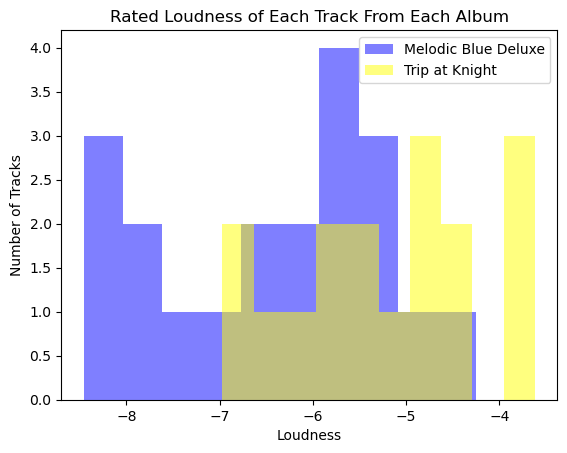

In [170]:
fig, ax1 = plt.subplots()
mbd = mbd_df['loudness']
tak = tak_df['loudness']
ax1.hist(mbd, alpha = 0.5, color = 'blue', label = 'Melodic Blue Deluxe')
ax1.hist(tak, alpha = 0.5, color = 'yellow', label = 'Trip at Knight')

ax1.set_title('Rated Loudness of Each Track From Each Album')
ax1.set_xlabel('Loudness')
ax1.set_ylabel('Number of Tracks')

ax1.legend()
plt.show()

The histogram below shows that on average the tracks from Trip at Knight have a higher valence. This helps me understand why I like most of the songs from a Trip at Knight, because generally I like happy, high energy songs. There are also a decent amount of tracks from Melodic Blue that have a high valence, and if I had to guess I would say that they are likely my favorite songs from the album. 

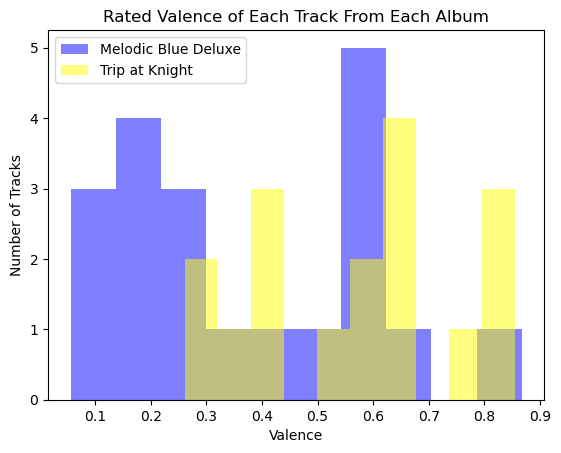

In [171]:
fig, ax1 = plt.subplots()
mbd = mbd_df['valence']
tak = tak_df['valence']
ax1.hist(mbd, alpha = 0.5, color = 'blue', label = 'Melodic Blue Deluxe')
ax1.hist(tak, alpha = 0.5, color = 'yellow', label = 'Trip at Knight')
ax1.legend()

ax1.set_title('Rated Valence of Each Track From Each Album')
ax1.set_xlabel('Valence')
ax1.set_ylabel('Number of Tracks')

plt.show()

This scatter plot shows the relationship between loudness and valence in the Melodic Blue Deluxe.

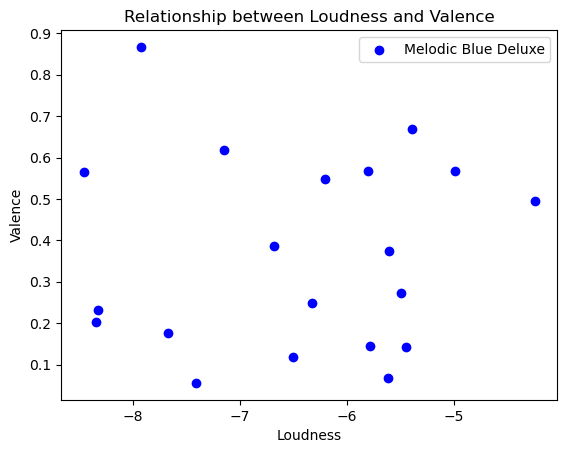

In [172]:
fig1, ax1 = plt.subplots()
ax1.scatter(mbd_df['loudness'], mbd_df['valence'], label = "Melodic Blue Deluxe", color = 'blue')
ax1.set_xlabel('Loudness')
ax1.set_ylabel('Valence')
ax1.set_title('Relationship between Loudness and Valence')
ax1.legend()
plt.show()

This scatter plot shows the relationship between loudness and valence in Trip at Knight.

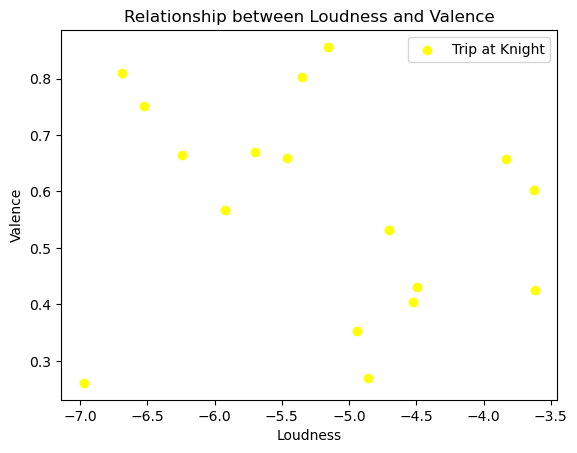

In [173]:
fig1, ax1 = plt.subplots()
ax1.scatter(tak_df['loudness'], tak_df['valence'], label = "Trip at Knight", color = 'yellow' )
ax1.set_xlabel('Loudness')
ax1.set_ylabel('Valence')
ax1.set_title('Relationship between Loudness and Valence')
ax1.legend()
plt.show()

This scatter plot shows the relationship between loudness and valence between the two albums. Since it shows both of the albums at once it helps to be able to visualize the difference.

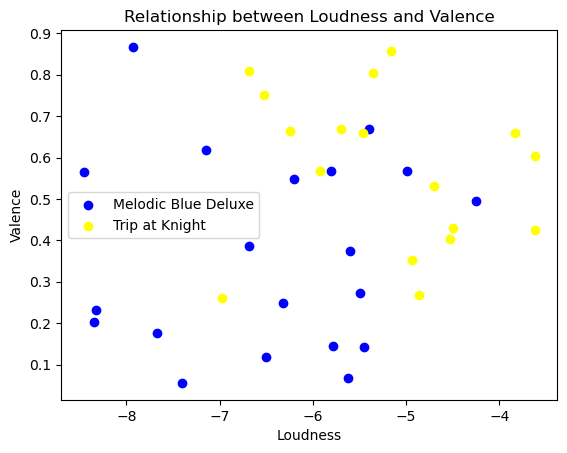

In [174]:
fig1, ax1 = plt.subplots()

ax1.scatter(mbd_df['loudness'], mbd_df['valence'], label = "Melodic Blue Deluxe", color = 'blue')
ax1.scatter(tak_df['loudness'], tak_df['valence'], label = "Trip at Knight", color = 'yellow' )
ax1.set_xlabel('Loudness')
ax1.set_ylabel('Valence')
ax1.set_title('Relationship between Loudness and Valence')
ax1.legend()
plt.show()

This boxplot shows the difference in danceability between the two albums. I found the results interesting but also pretty predicable. While I like Trip at Knight a lot I can see how it wouldn't be very danceable. On the other hand, I could see how many songs from Melodic Blue are considered danceable.

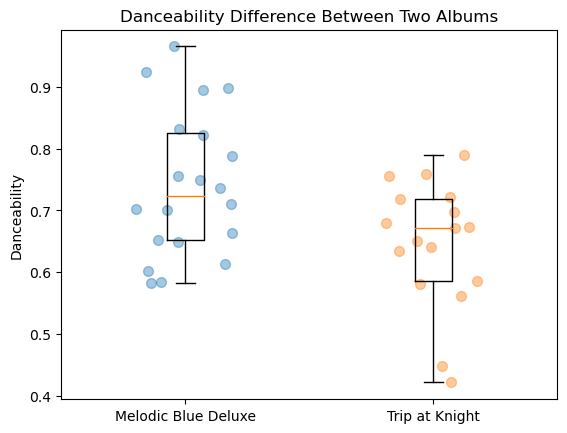

In [175]:
fig2, ax2 = plt.subplots()
mbd_val = mbd_df['danceability']
tak_val = tak_df['danceability']
mbd_x = [1] * len(mbd_val)
tak_x = [2] * len(tak_val)
mbd_x_jitter = np.random.uniform(-0.2, .2, len(mbd_x))
tak_x_jitter = np.random.uniform(-0.2, .2, len(tak_x))
ax2.scatter(mbd_x + mbd_x_jitter, mbd_val, alpha = 0.4, s = 50)
ax2.scatter(tak_x + tak_x_jitter, tak_val, alpha = 0.4, s = 50)
ax2.set_xlim(0.5, 2.5)
#fig2.set_figheight(5)
ax2.boxplot([mbd_val, tak_val])
ax2.set_xticks([1,2], ['Melodic Blue Deluxe', 'Trip at Knight'])

ax2.set_title('Danceability Difference Between Two Albums')
ax2.set_ylabel('Danceability')

plt.show()


A t-statistic of 2.6 is moderately high which means that there is a decent probability that there is a difference between the two albums danceability. The p-value of .01 means that generally this would be seen as statistically significant if using tne standard p-value cutoff of .05.

In [176]:
stats.ttest_ind(mbd_df['danceability'], tak_df['danceability'])

Ttest_indResult(statistic=2.6056419147727894, pvalue=0.013376735939065165)